## An Introduction to Keras and MNIST

For background, please review
https://en.wikipedia.org/wiki/MNIST_database

**This is a modified version of the original notebook by Francois Chollet.**

The following sources were also used

1.   https://github.com/wxs/keras-mnist-tutorial
2.   https://github.com/yashk2810/MNIST-Keras



### Getting the data

The MNIST dataset comes pre-loaded in Keras, in the form of a set of four Numpy arrays:

In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
help(mnist.load_data)

Help on function load_data in module keras.src.datasets.mnist:

load_data(path='mnist.npz')
    Loads the MNIST dataset.
    
    This is a dataset of 60,000 28x28 grayscale images of the 10 digits,
    along with a test set of 10,000 images.
    More info can be found at the
    [MNIST homepage](http://yann.lecun.com/exdb/mnist/).
    
    Args:
      path: path where to cache the dataset locally
        (relative to `~/.keras/datasets`).
    
    Returns:
      Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.
    
    **x_train**: uint8 NumPy array of grayscale image data with shapes
      `(60000, 28, 28)`, containing the training data. Pixel values range
      from 0 to 255.
    
    **y_train**: uint8 NumPy array of digit labels (integers in range 0-9)
      with shape `(60000,)` for the training data.
    
    **x_test**: uint8 NumPy array of grayscale image data with shapes
      (10000, 28, 28), containing the test data. Pixel values range
      from 0 to 255.
   

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


### Understanding the data and data shapes

Let's have a look at the training data:

In [4]:
type (train_images)

numpy.ndarray

In [5]:
train_images.shape
# 60K images, each image is a two-dimensional (28 x 28 array)

(60000, 28, 28)

In [6]:
train_labels.shape

(60000,)

In [7]:
train_labels[0]

5

In [8]:
train_images[0].shape # dimensions of a single image

(28, 28)

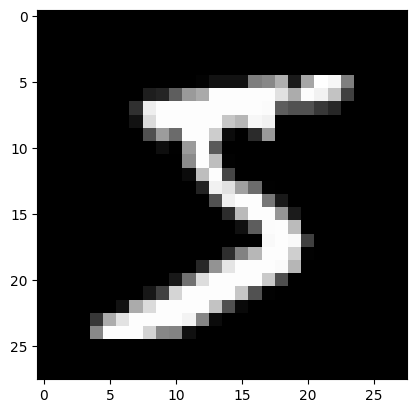

In [9]:
import matplotlib.pyplot as plt

plt.imshow(train_images[0], cmap='gray')

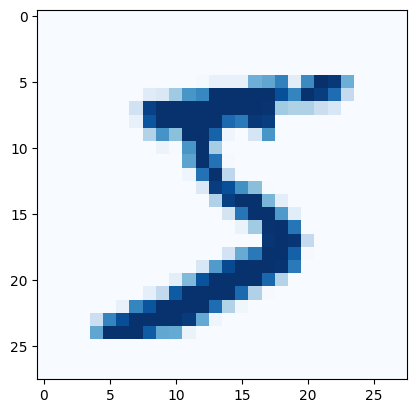

In [10]:
plt.imshow(train_images[0], cmap='Blues')

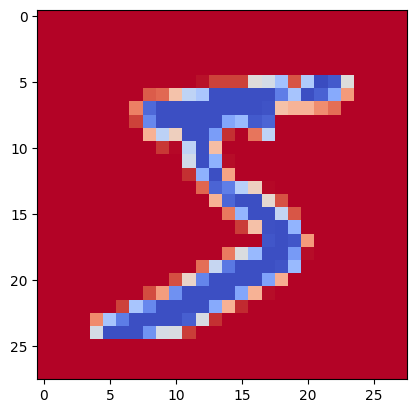

In [11]:
plt.imshow(train_images[0], cmap='coolwarm_r')

In [12]:
import numpy as np

with np.printoptions(linewidth=np.inf):
    print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [13]:
train_images[0].shape  # the shape of the first image

(28, 28)

In [14]:
type (train_images[0])

numpy.ndarray

In [15]:
train_images.shape

(60000, 28, 28)

In [16]:
len(train_labels)

60000

In [17]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [18]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [19]:
train_labels[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [20]:
test_images.shape

(10000, 28, 28)

In [21]:
len(test_labels)

10000

In [22]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### Feature Transformation


Before training, we will preprocess our data by reshaping it into the shape that the network expects, and scaling it so that all values are in
the `[0, 1]` range.

Previously, our training images for instance were stored in an array of shape `(60000, 28, 28)` of type `uint8` withvalues in the `[0, 255]` interval.

We transform it into a `float32` array of shape `(60000, 28 * 28)` with values between 0 and 1.

<img src='https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/flatten.png?raw=1' >

In [23]:
# Note the value of the original pixels is between 0 and 255
# We will flatten and scale the dataset to a value between 0 and 1

image_height, image_width = 28, 28

train_images = train_images.astype('float32') / 255
train_images = train_images.reshape((60000, image_height * image_width))

test_images = test_images.astype('float32') / 255
test_images = test_images.reshape((10000, image_height * image_width))

In [24]:
train_images.shape

(60000, 784)

In [25]:
test_images.shape

(10000, 784)

In [26]:
train_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [27]:
np.unique(train_images)

array([0.        , 0.00392157, 0.00784314, 0.01176471, 0.01568628,
       0.01960784, 0.02352941, 0.02745098, 0.03137255, 0.03529412,
       0.03921569, 0.04313726, 0.04705882, 0.05098039, 0.05490196,
       0.05882353, 0.0627451 , 0.06666667, 0.07058824, 0.07450981,
       0.07843138, 0.08235294, 0.08627451, 0.09019608, 0.09411765,
       0.09803922, 0.10196079, 0.10588235, 0.10980392, 0.11372549,
       0.11764706, 0.12156863, 0.1254902 , 0.12941177, 0.13333334,
       0.13725491, 0.14117648, 0.14509805, 0.14901961, 0.15294118,
       0.15686275, 0.16078432, 0.16470589, 0.16862746, 0.17254902,
       0.1764706 , 0.18039216, 0.18431373, 0.1882353 , 0.19215687,
       0.19607843, 0.2       , 0.20392157, 0.20784314, 0.21176471,
       0.21568628, 0.21960784, 0.22352941, 0.22745098, 0.23137255,
       0.23529412, 0.23921569, 0.24313726, 0.24705882, 0.2509804 ,
       0.25490198, 0.25882354, 0.2627451 , 0.26666668, 0.27058825,
       0.27450982, 0.2784314 , 0.28235295, 0.28627452, 0.29019

In [28]:
train_images.shape

(60000, 784)

### One-hot encoding label data

We also need to categorically encode the labels:

In [29]:
train_labels.shape

(60000,)

In [30]:
test_labels.shape

(10000,)

In [31]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [32]:
train_labels.shape

(60000, 10)

In [33]:
test_labels.shape

(10000, 10)

In [34]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [35]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [36]:
train_labels[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [37]:
train_labels[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)



## Build the network


In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense # fully connected neural network

network = Sequential()

# First layer of the neural network model
#Dense - fully connected node
network.add(Dense(512, activation='relu', input_shape=(28 * 28,)))

#Note the output is 10, representing the 10 different digits (class labels 0 - 9)
network.add(Dense(10, activation='softmax'))

In [39]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compile the network


In [40]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

## Train the network

In [41]:
history = network.fit(train_images, train_labels, epochs=5, batch_size=128, verbose=1)

Epoch 1/5
469/469 [==============================] - 6s 10ms/step - loss: 0.2637 - accuracy: 0.9243
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1067 - accuracy: 0.9686
Epoch 3/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0695 - accuracy: 0.9796
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0505 - accuracy: 0.9847
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0379 - accuracy: 0.9891


## Check test accuracy

In [42]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.0821 - accuracy: 0.9748
